# Rapidity

*Rapidity* is useful for working with relativistic velocities. It's a linear function of velocity, so you can add rapidities then convert back to velocity.

Rapidity is defined as:

\begin{equation}
\phi = \tanh^{-1} \left( \frac{v}{c} \right) \tag{1}
\end{equation}

Adding two rapidities is straightforward:

\begin{equation}
\phi_{\text{combined}} = \phi_1 + \phi_2 \tag{2}
\end{equation}

Convert the sum back to velocity:

\begin{equation}
v = c \tanh(\phi_{\text{combined}}) \tag{3}
\end{equation}

For more details see https://en.wikipedia.org/wiki/Rapidity

### Here's a simple example to illustrate the concept, using the Python library:

In [65]:
from mpmath import mp
import relativity_lib as rl

rl.configure(100)  # configure for 100 decimal places

velocity1 = 299_000_000  # m/s
velocity2 = 200_000_000  # m/s

# convert to rapidity
rapidity1 = rl.rapidity_from_velocity(velocity1)
rapidity2 = rl.rapidity_from_velocity(velocity2)

# add rapidities
rapidity_combined = rapidity1 + rapidity2

# convert back to velocity
total_velocity = rl.velocity_from_rapidity(rapidity_combined)

# print the result
print(f"{velocity1} m/s + {velocity2} m/s = {total_velocity} m/s")

299000000 m/s + 200000000 m/s = 299634062.1103876614430598240498658666172074467629163770200247909660180248789660634207065622793954775 m/s


## Getting things ready

In [66]:
from prettytable import PrettyTable, TableStyle
from IPython.display import Markdown

rl.configure(100)  # configure for 100 decimal places

table = PrettyTable(
    [
        "Velocity 1",
        "Velocity 2",
        "Naive add (incorrect)",
        "Rapidity 1",
        "Rapidity 2",
        "Rap1 + Rap2",
        "Final Velocity",
        "Fraction of c",
    ]
)
table.set_style(TableStyle.MARKDOWN)
table.align = "r"


def add_vel(velocity1, velocity2) -> None:
    velocity1 = rl.check_velocity(velocity1)
    velocity2 = rl.check_velocity(velocity2)

    # convert to rapidity
    rapidity1 = rl.rapidity_from_velocity(velocity1)
    rapidity2 = rl.rapidity_from_velocity(velocity2)

    # add rapidities, just a straight forward addition
    added_rapidity = rapidity1 + rapidity2

    # convert back to velocity
    final_velocity = rl.velocity_from_rapidity(added_rapidity)

    # format the results
    fmt_naive = rl.format_mpf(velocity1 + velocity2, 0)
    fmt_rap1 = rl.format_mpf_significant(rapidity1, 2)
    fmt_rap2 = rl.format_mpf_significant(rapidity2, 2)
    fmt_added_rap = rl.format_mpf_significant(added_rapidity, 4)
    fmt_final = rl.format_mpf_significant(final_velocity, 2, "9")
    fmt_c = rl.format_mpf_significant(final_velocity / rl.c, 2, "9")

    # add to the table
    table.add_row(
        [
            velocity1,
            velocity2,
            fmt_naive,
            fmt_rap1,
            fmt_rap2,
            fmt_added_rap,
            fmt_final,
            fmt_c,
        ]
    )

## Putting it into practice

Now we add various velocities using rapidity. Notice the difference between high and low speeds:

In [67]:
add_vel(10, 20)
add_vel("1000000", "1000000")
add_vel("10000000", "10000000")
add_vel("100000000", "100000000")
add_vel("200000000", "200000000")
add_vel("299792457.9", "299792457.999")
add_vel("299792457.9999", "299792457.99999999999999")
add_vel("299792457.99999999999999", "299792457.99999999999999999999")

markdown_table = table.get_string()
display(Markdown(markdown_table))

|               Velocity 1 |                     Velocity 2 | Naive add (incorrect) |  Rapidity 1 |  Rapidity 2 |  Rap1 + Rap2 |                                           Final Velocity |                                           Fraction of c |
|------------------------: |------------------------------: |---------------------: |-----------: |-----------: |------------: |--------------------------------------------------------: |-------------------------------------------------------: |
|                     10.0 |                           20.0 |                    30 | 0.000000033 | 0.000000066 | 0.0000001000 |                                       29.999999999999933 |                                                    0.00 |
|                1000000.0 |                      1000000.0 |             2,000,000 |      0.0033 |      0.0033 |     0.006671 |                                             1,999,977.74 |                                                    0.00 |
|               10000000.0 |                     10000000.0 |            20,000,000 |       0.033 |       0.033 |      0.06673 |                                            19,977,771.73 |                                                    0.06 |
|              100000000.0 |                    100000000.0 |           200,000,000 |        0.34 |        0.34 |       0.6936 |                                           179,975,072.54 |                                                    0.60 |
|              200000000.0 |                    200000000.0 |           400,000,000 |        0.80 |        0.80 |       1.6111 |                                           276,805,111.06 |                                                   0.923 |
|              299792457.9 |                  299792457.999 |           599,584,915 |       11.25 |       13.55 |      24.8169 |                               299,792,457.99999999999983 |                               0.99999999999999999999944 |
|           299792457.9999 |       299792457.99999999999999 |           599,584,915 |       14.71 |       26.22 |      40.9350 |                 299,792,457.9999999999999999999999999983 |                 0.9999999999999999999999999999999999944 |
| 299792457.99999999999999 | 299792457.99999999999999999999 |           599,584,915 |       26.22 |       33.13 |      59.3556 | 299,792,457.99999999999999999999999999999999999999999983 | 0.99999999999999999999999999999999999999999999999999944 |

## Plotting rapidity and velocity

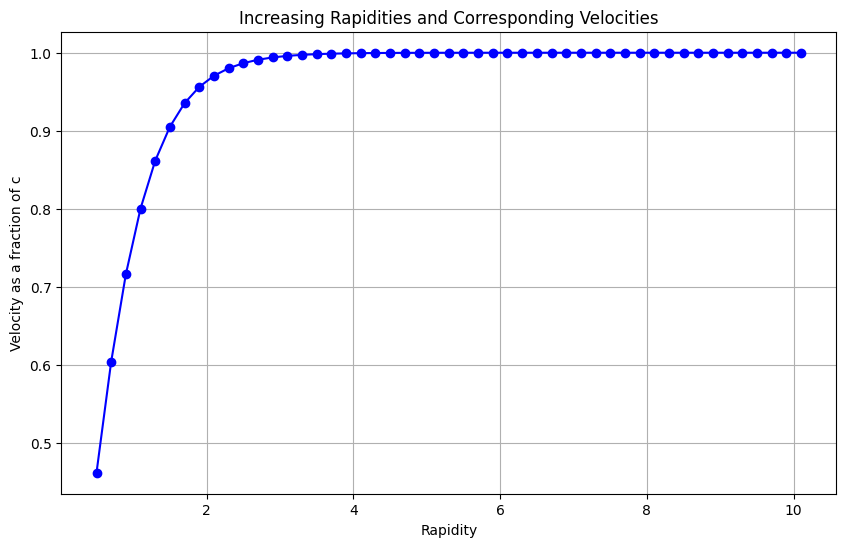

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Define the rapidities from 0.5 to 10 in steps of 0.2
rapidities = np.arange(0.5, 10.2, 0.2)

# Calculate the corresponding velocities and fractions of c
velocities = [rl.velocity_from_rapidity(r) for r in rapidities]
fractions_of_c = [v / rl.c for v in velocities]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rapidities, fractions_of_c, marker='o', linestyle='-', color='b')
plt.xlabel('Rapidity')
plt.ylabel('Velocity as a fraction of c')
plt.title('Increasing Rapidities and Corresponding Velocities')
plt.grid(True)
plt.show()